In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter


pd.set_option("display.max_colwidth", None)
sns.set(style="whitegrid")


In [ ]:

df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\NLP_AUGNITO\punctuation_restoration\data\mental_health_dataset2.csv")  

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample rows:")
df.head()


Shape: (3512, 2)

Columns: ['Context', 'Response']

Sample rows:


,Context,Response
0,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."
1,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this has not happened to you. Still, you should watch out for this because it can be a sign of a worsening depression. If you begin to think about this, it is important to reach out to a support system right away. The National Suicide Prevention Lifeline is 1-800-273-8255. The text line is #741741. I hope some other colleagues will provide you more suggestions. Be well...Robin Landwehr, DBH, LPCC"
2,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How

In [ ]:

print("Null values:", df["Response"].isna().sum())
print("Duplicates:", df["Response"].duplicated().sum())


df = df.dropna(subset=["Response"]).drop_duplicates(subset=["Response"]).reset_index(drop=True)
print("After cleaning:", df.shape)


Null values: 4
Duplicates: 1040
After cleaning: (2471, 2)


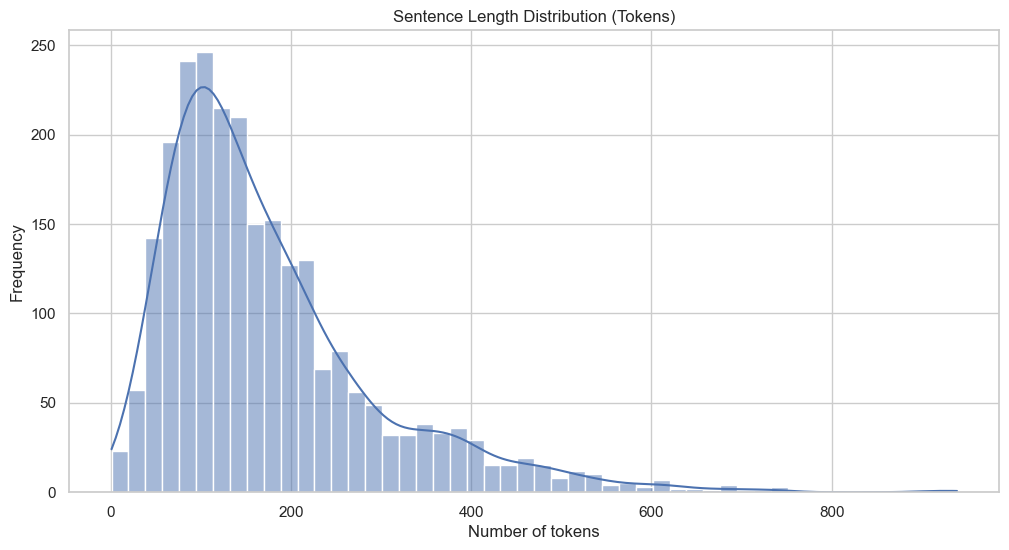

Mean tokens: 175.51112909753135
95th percentile tokens: 424.0
5th percentile tokens: 46.0
10th percentile tokens: 60.0
15th percentile tokens: 73.0
20th percentile tokens: 83.0
25th percentile tokens: 92.0
30th percentile tokens: 101.0
35th percentile tokens: 110.0
40th percentile tokens: 120.0
45th percentile tokens: 132.0
50th percentile tokens: 142.0
55th percentile tokens: 155.0
60th percentile tokens: 171.0
65th percentile tokens: 184.5
70th percentile tokens: 203.0
75th percentile tokens: 220.5
80th percentile tokens: 250.0
85th percentile tokens: 284.5
90th percentile tokens: 345.0
95th percentile tokens: 424.0


In [28]:
# Sentence length distribution

df["token_count"] = df["Response"].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,6))
sns.histplot(df["token_count"], kde=True)
plt.title("Sentence Length Distribution (Tokens)")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.show()

print("Mean tokens:", df["token_count"].mean())
print("95th percentile tokens:", df["token_count"].quantile(0.95))
for q in range(5,100,5):
    print(f"{q}th percentile tokens:", df["token_count"].quantile(q/100))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20476\2964014663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Punctuation", y="Count", data=punc_df, palette="muted")


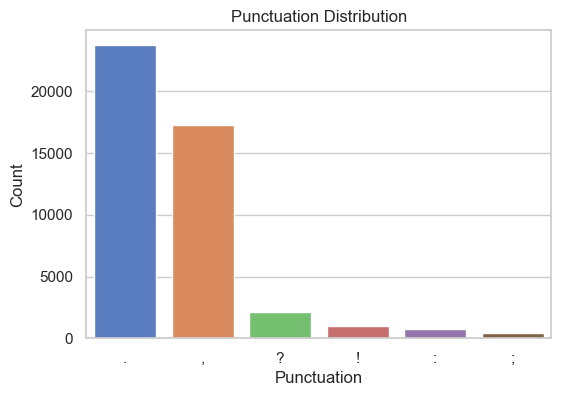

,Punctuation,Count
1,.,23757
0,",",17245
5,?,2091
2,!,959
4,:,764
3,;,415


In [ ]:

#  Punctuation distribution

def extract_punctuation(text):
    return re.findall(r"[.,!?;:]", text)

all_puncs = []
df["Response"].apply(lambda x: all_puncs.extend(extract_punctuation(x)))

punc_counts = Counter(all_puncs)
punc_df = pd.DataFrame(punc_counts.items(), columns=["Punctuation", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x="Punctuation", y="Count", data=punc_df, palette="muted")
plt.title("Punctuation Distribution")
plt.show()

punc_df


In [ ]:

#. Example transformation

example = df["Response"].iloc[10]
print("Original:", example)

# Remove punctuation for input
clean_example = re.sub(r"[.,!?;:]", "", example)
print("Without punctuation:", clean_example)

# Token-label mapping
tokens = clean_example.split()
labels = []
for i, word in enumerate(tokens):

    labels.append("O")  # default no punct
if example.strip()[-1] in [".", "?", "!", ";", ":"]:
    labels[-1] = example.strip()[-1]

list(zip(tokens, labels))


Original: People who feel worthless were, in one way or another, were told that they are worthless. This is the lie that they are living with. The work of therapy is to help people see their true good selves. This gives them self esteem.
Without punctuation: People who feel worthless were in one way or another were told that they are worthless This is the lie that they are living with The work of therapy is to help people see their true good selves This gives them self esteem


[('People', 'O'),
 ('who', 'O'),
 ('feel', 'O'),
 ('worthless', 'O'),
 ('were', 'O'),
 ('in', 'O'),
 ('one', 'O'),
 ('way', 'O'),
 ('or', 'O'),
 ('another', 'O'),
 ('were', 'O'),
 ('told', 'O'),
 ('that', 'O'),
 ('they', 'O'),
 ('are', 'O'),
 ('worthless', 'O'),
 ('This', 'O'),
 ('is', 'O'),
 ('the', 'O'),
 ('lie', 'O'),
 ('that', 'O'),
 ('they', 'O'),
 ('are', 'O'),
 ('living', 'O'),
 ('with', 'O'),
 ('The', 'O'),
 ('work', 'O'),
 ('of', 'O'),
 ('therapy', 'O'),
 ('is', 'O'),
 ('to', 'O'),
 ('help', 'O'),
 ('people', 'O'),
 ('see', 'O'),
 ('their', 'O'),
 ('true', 'O'),
 ('good', 'O'),
 ('selves', 'O'),
 ('This', 'O'),
 ('gives', 'O'),
 ('them', 'O'),
 ('self', 'O'),
 ('esteem', '.')]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20476\3937756732.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Label", y="Count", data=label_df, palette="Set2")


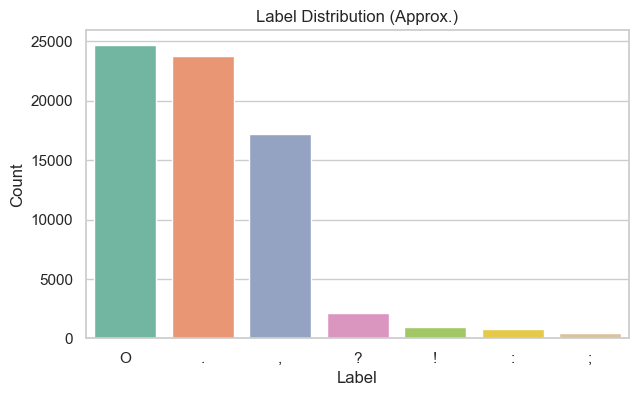

,Label,Count
0,O,24710
2,.,23757
1,",",17245
6,?,2091
3,!,959
5,:,764
4,;,415


In [22]:

# . Class balance (labels)
label_counts = {"O": len(df)*10} 
for punc, count in punc_counts.items():
    label_counts[punc] = count

label_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x="Label", y="Count", data=label_df, palette="Set2")
plt.title("Label Distribution (Approx.)")
plt.show()

label_df


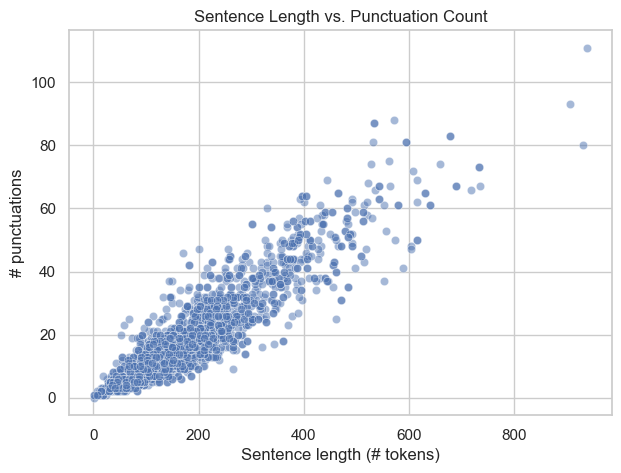

Correlation between sentence length and punctuation count: 0.919


In [23]:
#  Correlation: Sentence Length vs Punctuation Count

df["punc_count"] = df["Response"].apply(lambda x: len(extract_punctuation(x)))

plt.figure(figsize=(7,5))
sns.scatterplot(x="token_count", y="punc_count", data=df, alpha=0.5)
plt.title("Sentence Length vs. Punctuation Count")
plt.xlabel("Sentence length (# tokens)")
plt.ylabel("# punctuations")
plt.show()

corr = df["token_count"].corr(df["punc_count"])
print(f"Correlation between sentence length and punctuation count: {corr:.3f}")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20476\1799806479.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = df.groupby("length_bucket")["punc_count"].mean().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20476\1799806479.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="length_bucket", y="punc_count", data=bucket_stats, palette="coolwarm")


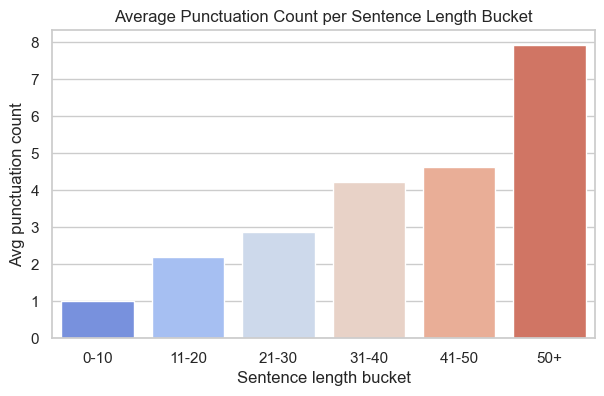

,length_bucket,punc_count
0,0-10,1.000000
1,11-20,2.187500
2,21-30,2.884615
3,31-40,4.225000
4,41-50,4.633803
5,50+,7.934629


In [24]:
#  Average punctuation usage by sentence length buckets

df["length_bucket"] = pd.cut(df["token_count"], bins=[0,10,20,30,40,50,100], labels=["0-10","11-20","21-30","31-40","41-50","50+"])

bucket_stats = df.groupby("length_bucket")["punc_count"].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x="length_bucket", y="punc_count", data=bucket_stats, palette="coolwarm")
plt.title("Average Punctuation Count per Sentence Length Bucket")
plt.xlabel("Sentence length bucket")
plt.ylabel("Avg punctuation count")
plt.show()

bucket_stats
